In [12]:
# Imports

# Plotly imports
import plotly.graph_objects as go
import plotly.express as px

# Importing the api and instantiating the rest client according to our keys
import alpaca_trade_api as api

# Yaml
import yaml

In [4]:
# Read config
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [5]:
# Create Alpaca client
alpaca = api.REST(config['api-key'], config['api-secret'])

In [6]:
# Fetch tick data
start_time = '2023-06-01T12:30:00-05:00'
end_time = '2023-06-01T12:31:00-05:00'
aapl_trades = alpaca.get_trades('AAPL', start=start_time, end=end_time, limit=10000).df


exchange_histogram = px.histogram(aapl_trades, x="exchange")
exchange_histogram.update_layout(
    title="Frequency of exchanges in the first 10,000 trades of $AAPL on January 19, 2022",
    yaxis_title="Number of trades",
    xaxis_title="Exchange")
exchange_histogram.show()

In [14]:
# Fetch minute data
aapl_minute_bars = alpaca.get_bars("AAPL", "1Min", "2023-06-01", "2023-06-01").df.between_time('12:00','12:30')

In [15]:
# mpf.plot(
#     aapl_minute_bars.between_time('12:30', '13:00'), 
#     type='candle', 
#     style='classic', 
#     volume=False, 
#     ylabel='Price', 
#     title='AAPL 2023-06-01 12:30pm-13:00pm (Minute data)')

candlestick_fig = go.Figure(data=[go.Candlestick(
    x=aapl_minute_bars.index,
    open=aapl_minute_bars['open'],
    high=aapl_minute_bars['high'],
    low=aapl_minute_bars['low'],
    close=aapl_minute_bars['close'])])

candlestick_fig.update_layout(
    title="Candlestick chart for $AAPL",
    xaxis_title="Date",
    yaxis_title="Price ($USD)")

candlestick_fig.show()

In [9]:
# Fetch daily data
aapl_daily_bars = alpaca.get_bars("AAPL", "1Day", "2023-01-01", "2023-01-31").df

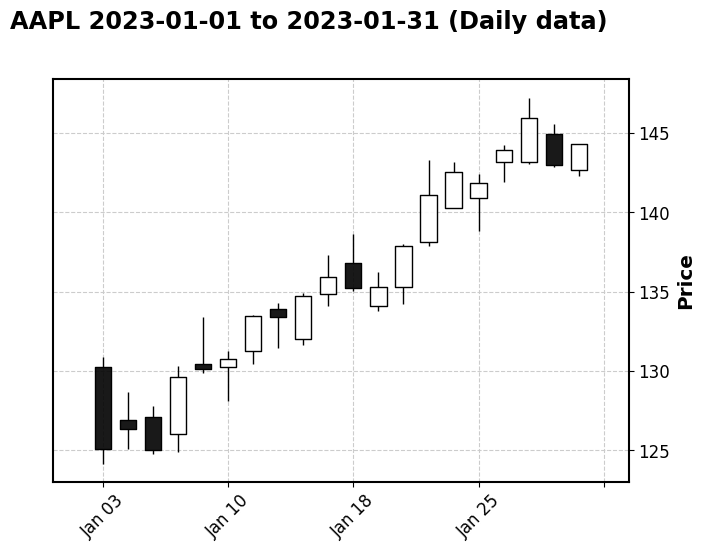

In [10]:
mpf.plot(
    aapl_daily_bars, 
    type='candle', 
    style='classic', 
    volume=False, 
    ylabel='Price', 
    title='AAPL 2023-01-01 to 2023-01-31 (Daily data)')